In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cwd=os.getcwd()
data_vehicles_path=os.path.join(cwd,"data_vehicles_french_2013_2021.csv")
data_vehicles_2013_2021 = pd.read_csv(data_vehicles_path, low_memory=False).fillna(0)
data_repartition_vehicles_2022path = os.path.join(cwd,"breakdown-of-available-cars-by-powertrain-and-segment-2022.csv")
data_repartition_vehicles_2022 = pd.read_csv(data_repartition_vehicles_2022path, low_memory=False, delimiter=';').fillna(0)
repartitionvehiculesneufs_path = os.path.join(cwd,"sect-ind-auto-immat-energie.xlsx")
repartitionvehiculesneufs = pd.read_excel(repartitionvehiculesneufs_path,header=3,)

In [3]:
repartitionvehiculesneufs = repartitionvehiculesneufs.loc[[0,1,2,3,4,5],:]
data_repartition_vehicles_2022 = data_repartition_vehicles_2022.iloc[[2,3,4,5],:]

In [5]:
repartitionvehiculesneufs_2015_2021=repartitionvehiculesneufs[["Type d'énergie",2015,2021]]
repartitionvehiculesneufs_2015_2021

,Type d'énergie,2015,2021
0,Essence,739.374,669.928
1,Diesel,1097.122,349.479
2,Hybride1,61.617,430.899
3,Électricité,17.268,162.106
4,Bicarburation (essence + GPL + GNV),1.553,46.422
5,Autres2,0.288,0.170


0    0.385649
1    0.572246
2    0.032139
3    0.009007
4    0.000810
5    0.000150
Name: 2015, dtype: float64


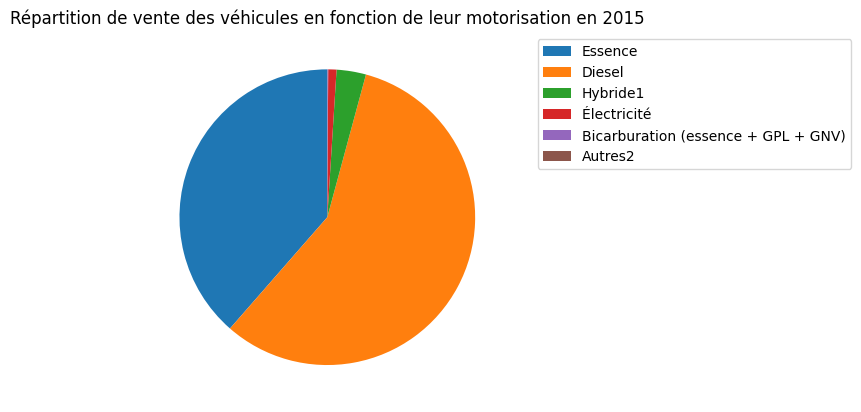

0    0.403813
1    0.210656
2    0.259734
3    0.097713
4    0.027982
5    0.000102
Name: 2021, dtype: float64


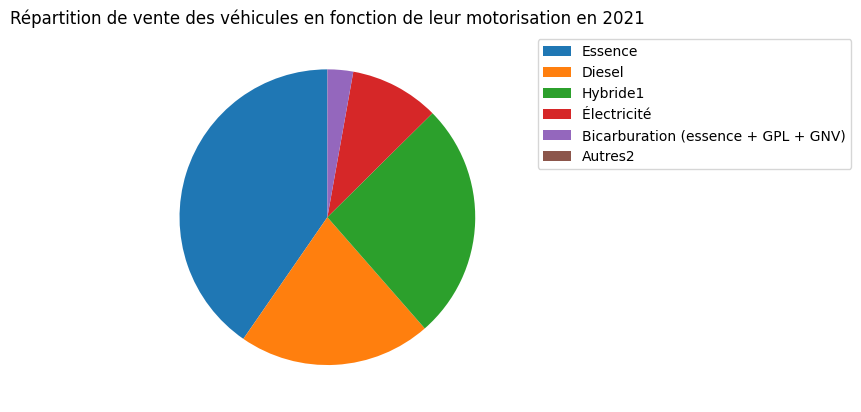

In [223]:
#répartition de vente des véhicules en fonction de leur motorisation

year=[2015,2021]
for i in year:
    data=repartitionvehiculesneufs[["Type d'énergie",i]]
    plt.pie( data.loc[:,i], labels= data.loc[:,"Type d'énergie"], autopct=None, startangle=90, labeldistance=None)
    val_legende=data.loc[:,i]/(sum(data.loc[:,i]))
    print(val_legende)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title('Répartition de vente des véhicules en fonction de leur motorisation en {}'.format(i))
    plt.show()

In [94]:
data_vehicles_2013_2021.columns

Index(['ID', 'Country', 'VFN', 'Mp', 'Mh', 'Man', 'MMS', 'Tan', 'T', 'Va',
       'Ve', 'Mk', 'Cn', 'Ct', 'Cr', 'r', 'm (kg)', 'Mt', 'Enedc (g/km)',
       'Ewltp (g/km)', 'W (mm)', 'At1 (mm)', 'At2 (mm)', 'Ft', 'Fm',
       'ec (cm3)', 'ep (KW)', 'z (Wh/km)', 'IT', 'Ernedc (g/km)',
       'Erwltp (g/km)', 'De', 'Vf', 'Status', 'year', 'Date of registration',
       'Fuel consumption ', 'Electric range (km)'],
      dtype='object')

In [3]:
#on garde seulement les colonnes qui nous intéressent
data_vehicles_final=data_vehicles_2013_2021.loc[:,['Mh','Cn','year','Ft','m (kg)','Enedc (g/km)','Ewltp (g/km)','Electric range (km)','Fuel consumption ']].drop_duplicates(subset='Cn',keep='first').sort_values('year',ascending=True) 
#on reshape les data (pour uniformiser les catégories)
data_vehicles_final = data_vehicles_final[data_vehicles_final['Mh']!='PSA']
data_vehicles_final = data_vehicles_final[data_vehicles_final['Ft']!=0]
data_vehicles_final['Ft']=data_vehicles_final['Ft'].apply(lambda x : x.lower())

data_vehicles_final.head(-10)

,Mh,Cn,year,Ft,m (kg),Enedc (g/km),Ewltp (g/km),Electric range (km),Fuel consumption
0,RENAULT,CLIO,2013,petrol,1062.0,135.0,0.0,0.0,0.0
947,AUTOMOBILES CITROEN,DS4 / 1.6 / HDI AUT.,2013,diesel,1375.0,114.0,0.0,0.0,0.0
946,AUTOMOBILES CITROEN,DS4 / 1.6 / HDI,2013,diesel,1370.0,113.0,0.0,0.0,0.0
945,AUTOMOBILES CITROEN,DS3 RACING / 1.6 / 16V TURBO,2013,petrol,1240.0,149.0,0.0,0.0,0.0
944,AUTOMOBILES CITROEN,DS3 / 1.6 / 16V TURBO,2013,petrol,1165.0,135.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1593,AUTOMOBILES CITROEN,JUMPY SPACE TOURER / 2.0 / HDI L2,2021,diesel,1793.0,0.0,183.0,0.0,7.0
1592,AUTOMOBILES CITROEN,JUMPY SPACE TOURER / 2.0 / AUT.HDI L2,2021,diesel,1839.0,0.0,186.0,0.0,7.1
1591,AUTOMOBILES CITROEN,JUMPY SPACE TOURER / 1.5 / HDI L2,2021,diesel,1734.0,0.0,167.0,0.0,6.4
1584,AUTOMOBILES CITROEN,C4 SPACETOURER / 2.0 / HDI AUT.,2021,diesel,1615.0,0.0,160.0,0.0,6.1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


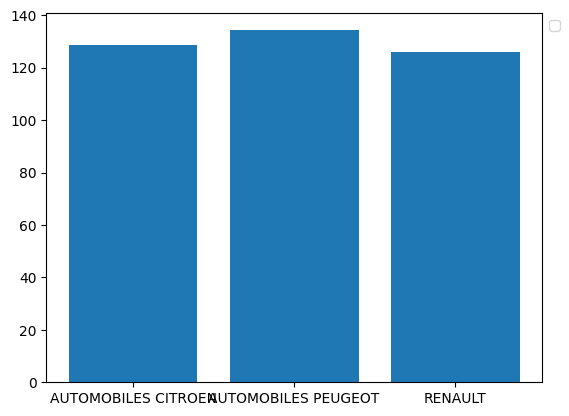

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


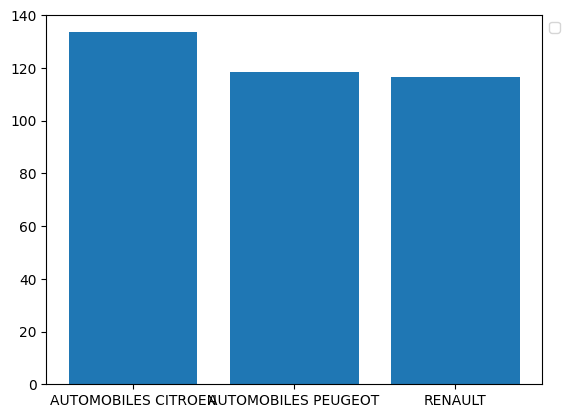

In [4]:
data_vehicles_constr = data_vehicles_final.loc[:,['Mh','year','Enedc (g/km)', 'Ewltp (g/km)']].groupby(['year','Mh'])
data_emission_mean = data_vehicles_constr.mean() #on construit le dataframe de la valeur moyenne des émissions
constr=list(set(data_vehicles_final['Mh'])) #on récupère la liste des constructeurs
year=[2013,2021]
for i in range(len(year)):
    data_emission=data_emission_mean.loc[data_emission_mean.index[[3*i,3*i+1,3*i+2]]]
    if i==0:
        values='Enedc (g/km)' #type de controle qui a changé
    elif i==1:
        values = 'Ewltp (g/km)' #type de controle qui a changé
    plt.bar(constr, data_emission[values])
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()
        


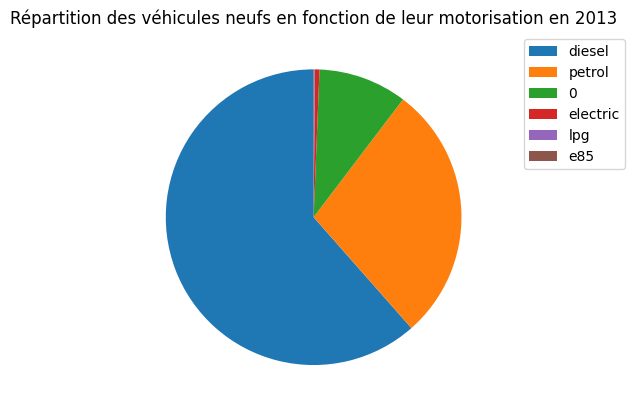

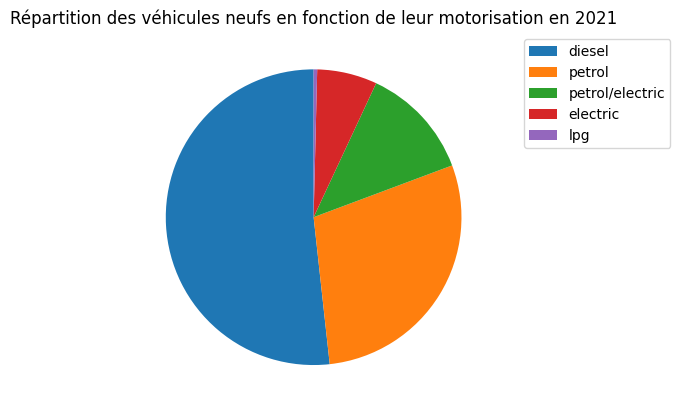

In [5]:
#affichage de la répartition des véhicules neufs dévéloppés par les constructeurs français

year=[2013,2021]
for i in range(len(year)):
    data=data_vehicles_final[data_vehicles_final["year"]==year[i]]
    compt_ft=data['Ft'].value_counts()
    plt.pie(compt_ft.values, labels=compt_ft.index, startangle=90,labeldistance=None)
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.title('Répartition des véhicules neufs en fonction de leur motorisation en {}'.format(year[i]))
    plt.show()

In [4]:
liste=[]
for i in range(len(data_repartition_vehicles_2022)):
    for elem in data_repartition_vehicles_2022.iloc[i,:]:
        liste.append(elem)

In [5]:
liste[0]

',Small car,Medium car,Crossover,Large car,SUV'

In [6]:
#on écrit une fonction qui trie la string

def extraire_nombres_lettres(chaine):
    numeros = []
    numero_en_cours = ''
    mot_en_cours = ''
    mot=[]

    for caractere in chaine:
        if caractere.isdigit() or caractere == '.':
            # Ajouter le chiffre ou le point au numéro en cours
            numero_en_cours = numero_en_cours + caractere
        elif numero_en_cours:
            # Si le numéro en cours n'est pas vide, ajouter à la liste des nombres
            numeros.append(float(numero_en_cours))
            numero_en_cours = ''  # Réinitialiser le numéro en cours
        elif caractere.isalpha():
            mot_en_cours=mot_en_cours+caractere
        elif mot_en_cours:
            mot.append(mot_en_cours)
            mot_en_cours=''

    # Ajouter le dernier numéro si la chaîne se termine par un nombre
    if numero_en_cours:
        numeros.append(float(numero_en_cours))
    elif mot_en_cours:
        mot.append(mot_en_cours)
    

    return numeros, mot

# Exemple d'utilisation
chaine_de_caracteres = ',Small car,Medium car,Crossover,Large car,SUV'
nombres_extraits = extraire_nombres_lettres(chaine_de_caracteres)
print(nombres_extraits)



([], ['Small', 'car', 'Medium', 'car', 'Crossover', 'Large', 'car', 'SUV'])


In [7]:
label= extraire_nombres_lettres(',Small ,Medium ,Crossover,Large ,SUV')[1]
dico={}
for i in range(1,len(liste)):
    pourcent_nom_extrait= extraire_nombres_lettres(liste[i])
    dico[pourcent_nom_extrait[1][0]]=pourcent_nom_extrait[0]


In [13]:
dico_valeurs={}
for i in range(len(label)):
    list=[]
    for elem in dico.keys():
        list.append(dico[elem][i])
    dico_valeurs[label[i]]=np.array(list)
    
dico_valeurs

{'Small': array([21., 16., 19.]),
 'Medium': array([22., 25., 17.]),
 'Crossover': array([3., 2., 5.]),
 'Large': array([15., 14., 19.]),
 'SUV': array([39., 43., 41.])}

In [23]:
table1= np.array(dico_valeurs.keys())

print(table1)

dict_keys(['Small', 'Medium', 'Crossover', 'Large', 'SUV'])


In [28]:
dico_somme={}
i=1
dico_somme[0]=np.array([0,0,0])
for elem in dico_valeurs:
    dico_somme[i]=dico_somme[i-1]+dico_valeurs[elem]
    i=i+1
    
dico_somme

{0: array([0, 0, 0]),
 1: array([21., 16., 19.]),
 2: array([43., 41., 36.]),
 3: array([46., 43., 41.]),
 4: array([61., 57., 60.]),
 5: array([100., 100., 101.])}

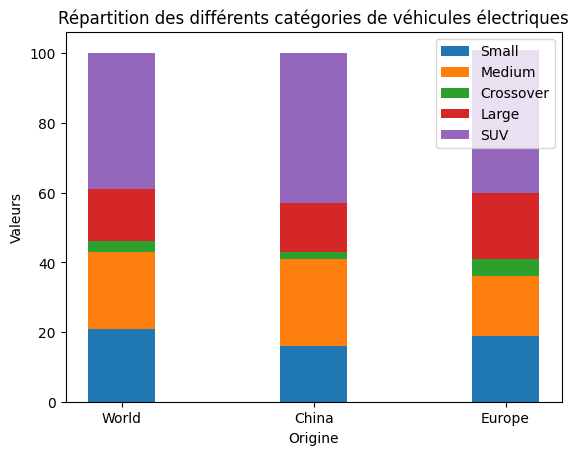

In [32]:
dico_somme={} #dictionnaire utilisé pour empiler les barres sur le graphique
i=1
dico_somme[0]=np.array([0,0,0])
for elem in dico_valeurs:
    dico_somme[i]=dico_somme[i-1]+dico_valeurs[elem]
    i=i+1


categories = dico.keys()  #on donne les différentes catégories de véhicules
dico_valeurs={}
for i in range(len(label)):
    list=[]
    for elem in dico.keys():
        list.append(dico[elem][i])
    dico_valeurs[label[i]]=list

# Création d'un graphique en barres empilées
fig, ax = plt.subplots()

bar_width = 0.35  # Largeur des barres

# Coordonnées pour chaque catégorie
indices = np.arange(len(categories))

# Tracer les barres empilées
i=0
for elem in dico_valeurs:
    bar=ax.bar(indices, dico_valeurs[elem], bar_width, bottom=dico_somme[i], label=elem)
    i=i+1


ax.set_xlabel('Origine')
ax.set_ylabel('Valeurs')
ax.set_title('Répartition des différents catégories de véhicules électriques')
ax.set_xticks(indices)
ax.set_xticklabels(dico.keys())
ax.legend()

plt.show()
